<a href="https://colab.research.google.com/github/Piternicolas/Card-Fraud/blob/main/FRAUDES_EM_CART%C3%95ES_DE_CR%C3%89DITOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

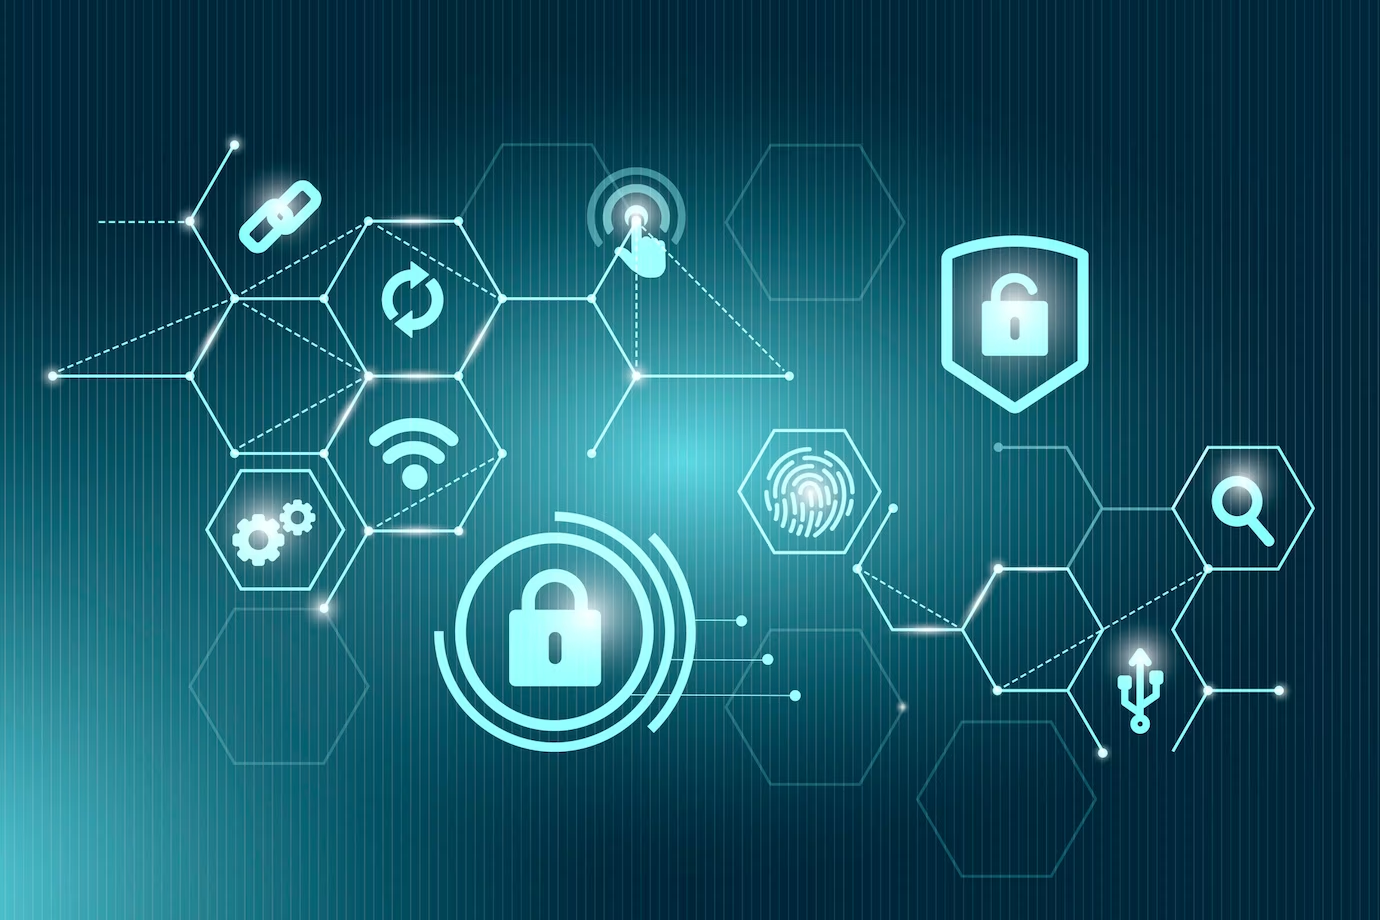

# **Fraude em cartões de créditos**
### Esse projeto será para desenvolver um algoritmo de machine learning e fazer um trabalho completo para detecção de fraudes em cartões de crédito.
* Os dados são de um Dataset disponível no Kaggle, contendo dados de transações disponibilizadas de algumas empresas Europeias. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
df = pd.read_csv('creditcard.csv')

In [15]:
print('Colunas:\t',df.shape[1])
print('Entradas:\t',df.shape[0])
df[:5]
print('Entradas nulas:\t',df.isna().sum().max())

Colunas:	 31
Entradas:	 284807
Entradas nulas:	 0


* Vou fazer a separação dos valores para teste e treino, 20% foi separado para teste

In [16]:
dfteste = df.sample(frac=1/5, random_state=0)
df = df.drop(dfteste.index)
print('DF de teste:',dfteste.shape)
print('DF para treino',df.shape)

DF de teste: (56961, 31)
DF para treino (227846, 31)


* ### Após a separação precisamos analisar nos dados se há correlação, quais os valores máximos e mínimos.
## **Dicionário:**
* `Time:` segundos decorridos desde a primeira transação.
* `Amount:` quantia transacionada.
* `Class:` classifica a transação se é fraudulenta ou não. `0` é não e `1` é sim.

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,...,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000
mean,94832.498547,0.002940,-0.000883,-0.001476,0.001123,-0.001718,-0.001036,-0.000416,-0.001361,-0.000024,...,0.000265,0.000300,-0.000275,0.000688,0.000191,-0.000585,-0.000574,-0.000135,88.629880,0.001716
std,47500.754394,1.955267,1.649671,1.515054,1.416362,1.365960,1.326401,1.225316,1.205506,1.099972,...,0.737591,0.726703,0.623073,0.605267,0.520834,0.481942,0.401393,0.320749,248.037293,0.041390
min,0.000000,-46.855047,-63.344698,-33.680984,-5.683171,-42.147898,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54202.250000,-0.919898,-0.599016,-0.894455,-0.847413,-0.693587,-0.769197,-0.553592,-0.209145,-0.644502,...,-0.228656,-0.543190,-0.161766,-0.354151,-0.316643,-0.327647,-0.070776,-0.052865,5.690000,0.000000
50%,84738.500000,0.021888,0.063968,0.177134,-0.017563,-0.055518,-0.274913,0.039979,0.021540,-0.050358,...,-0.028980,0.006967,-0.010913,0.041163,0.017424,-0.052448,0.001093,0.011171,22.000000,0.000000
75%,139337.000000,1.316873,0.802507,1.026046,0.744464,0.610139,0.397214,0.569937,0.325848,0.597785,...,0.187106,0.529854,0.147642,0.439915,0.350740,0.240838,0.090529,0.078140,77.600000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.099309,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.463246,12.152401,22.620072,19656.530000,1.000000


## **Observações:**
* A coluna `Time` mostra que as transações ocorreram dentro de um prazo de 48 horas (172.792 segundos, 2.879,8 minutos).
* Na coluna `Amount` mostra que a quantia mínima em dinheiro transacionada  foi **0** e o máximo foi **19.656,00**, tendo uma média de **88,69**. E **75%** dos dados estão com valores até 77,72.
---
* Abaixo vamos ver o balanceamento dos dados na coluna `Class`.

In [18]:
print('Não fraudes e fraudes:\n',df.Class.value_counts())
print()
print('{:.2f}% de fraudes'.format(df.loc[df.Class == 1].shape[0]/df.shape[0]*100))

Não fraudes e fraudes:
 0    227455
1       391
Name: Class, dtype: int64

0.17% de fraudes


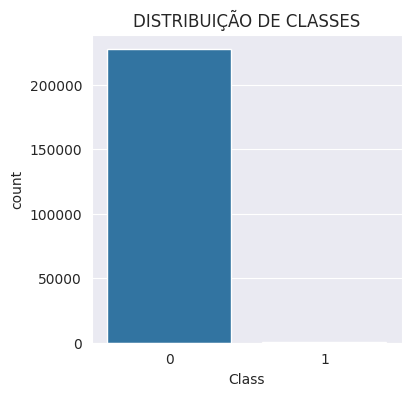

In [55]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(4,4))

sns.countplot(x='Class', data=df, ax=ax)
ax.set_title('DISTRIBUIÇÃO DE CLASSES')

plt.show()

* Os dados estão totalmente desbalanceados.

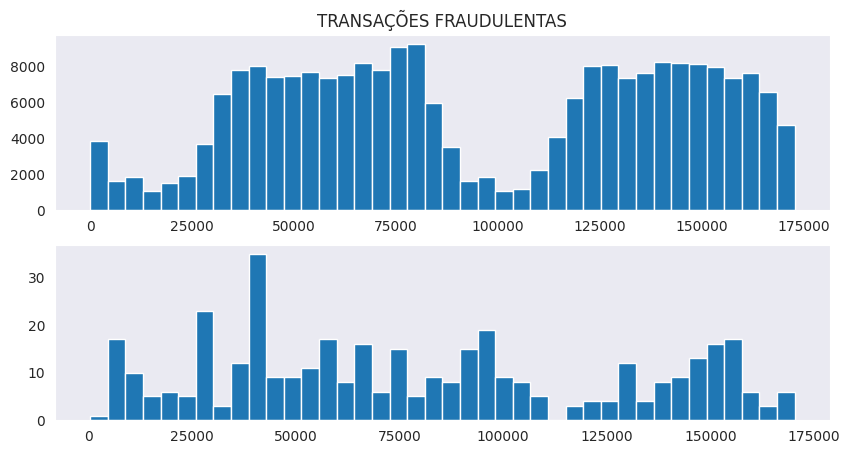

In [20]:
sns.set_style('dark')

fig, ax = plt.subplots(nrows=2, figsize=(10,5))

ax[0].hist(df.Time[df.Class == 0], bins=40)
ax[0].set_title('TRANSAÇÕES NÃO FRAUDULENTAS')

ax[1].hist(df.Time[df.Class == 1], bins=40)
ax[0].set_title('TRANSAÇÕES FRAUDULENTAS')

plt.show()

* Realmente há uma diferença no decorrer das transações fraudulentas.

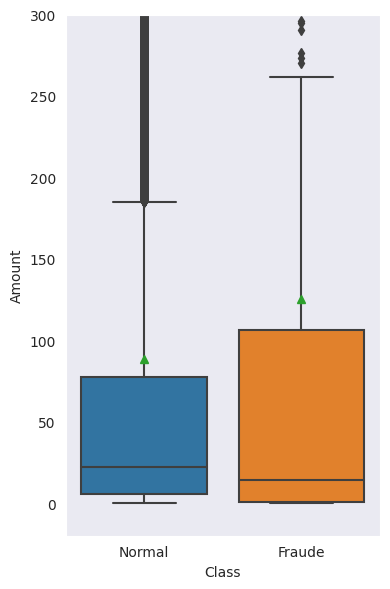

In [21]:
fig, ax = plt.subplots(figsize=(4,6), sharex=True)

sns.boxplot(x='Class', y='Amount', data=df, showmeans=True, ax=ax)
plt.ylim((-20,300))
plt.xticks([0,1], ['Normal','Fraude'])

plt.tight_layout()

In [22]:
print('Fraudes detectadas:',df.loc[df.Class == 1].shape[0])
print('\n')
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

Fraudes detectadas: 391




count     390.000000
mean      120.509308
std       243.685685
min         0.000000
25%         1.000000
50%        13.385000
75%       105.965000
max      1809.680000
Name: Amount, dtype: float64

* Abaixo vamos ver as distribuições das variáveis.

<ipython-input-23-577dceb03fc0>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Class0[cols], label="Class 0", shade=True)
<ipython-input-23-577dceb03fc0>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Class1[cols], label="Class 1", shade=True)
<ipython-input-23-577dceb03fc0>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Class0[cols], label="Class 0", shade=True)
<ipython-input-23-577dceb03fc0>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Class1[cols], label="Class 1", shade=True)
<ipy

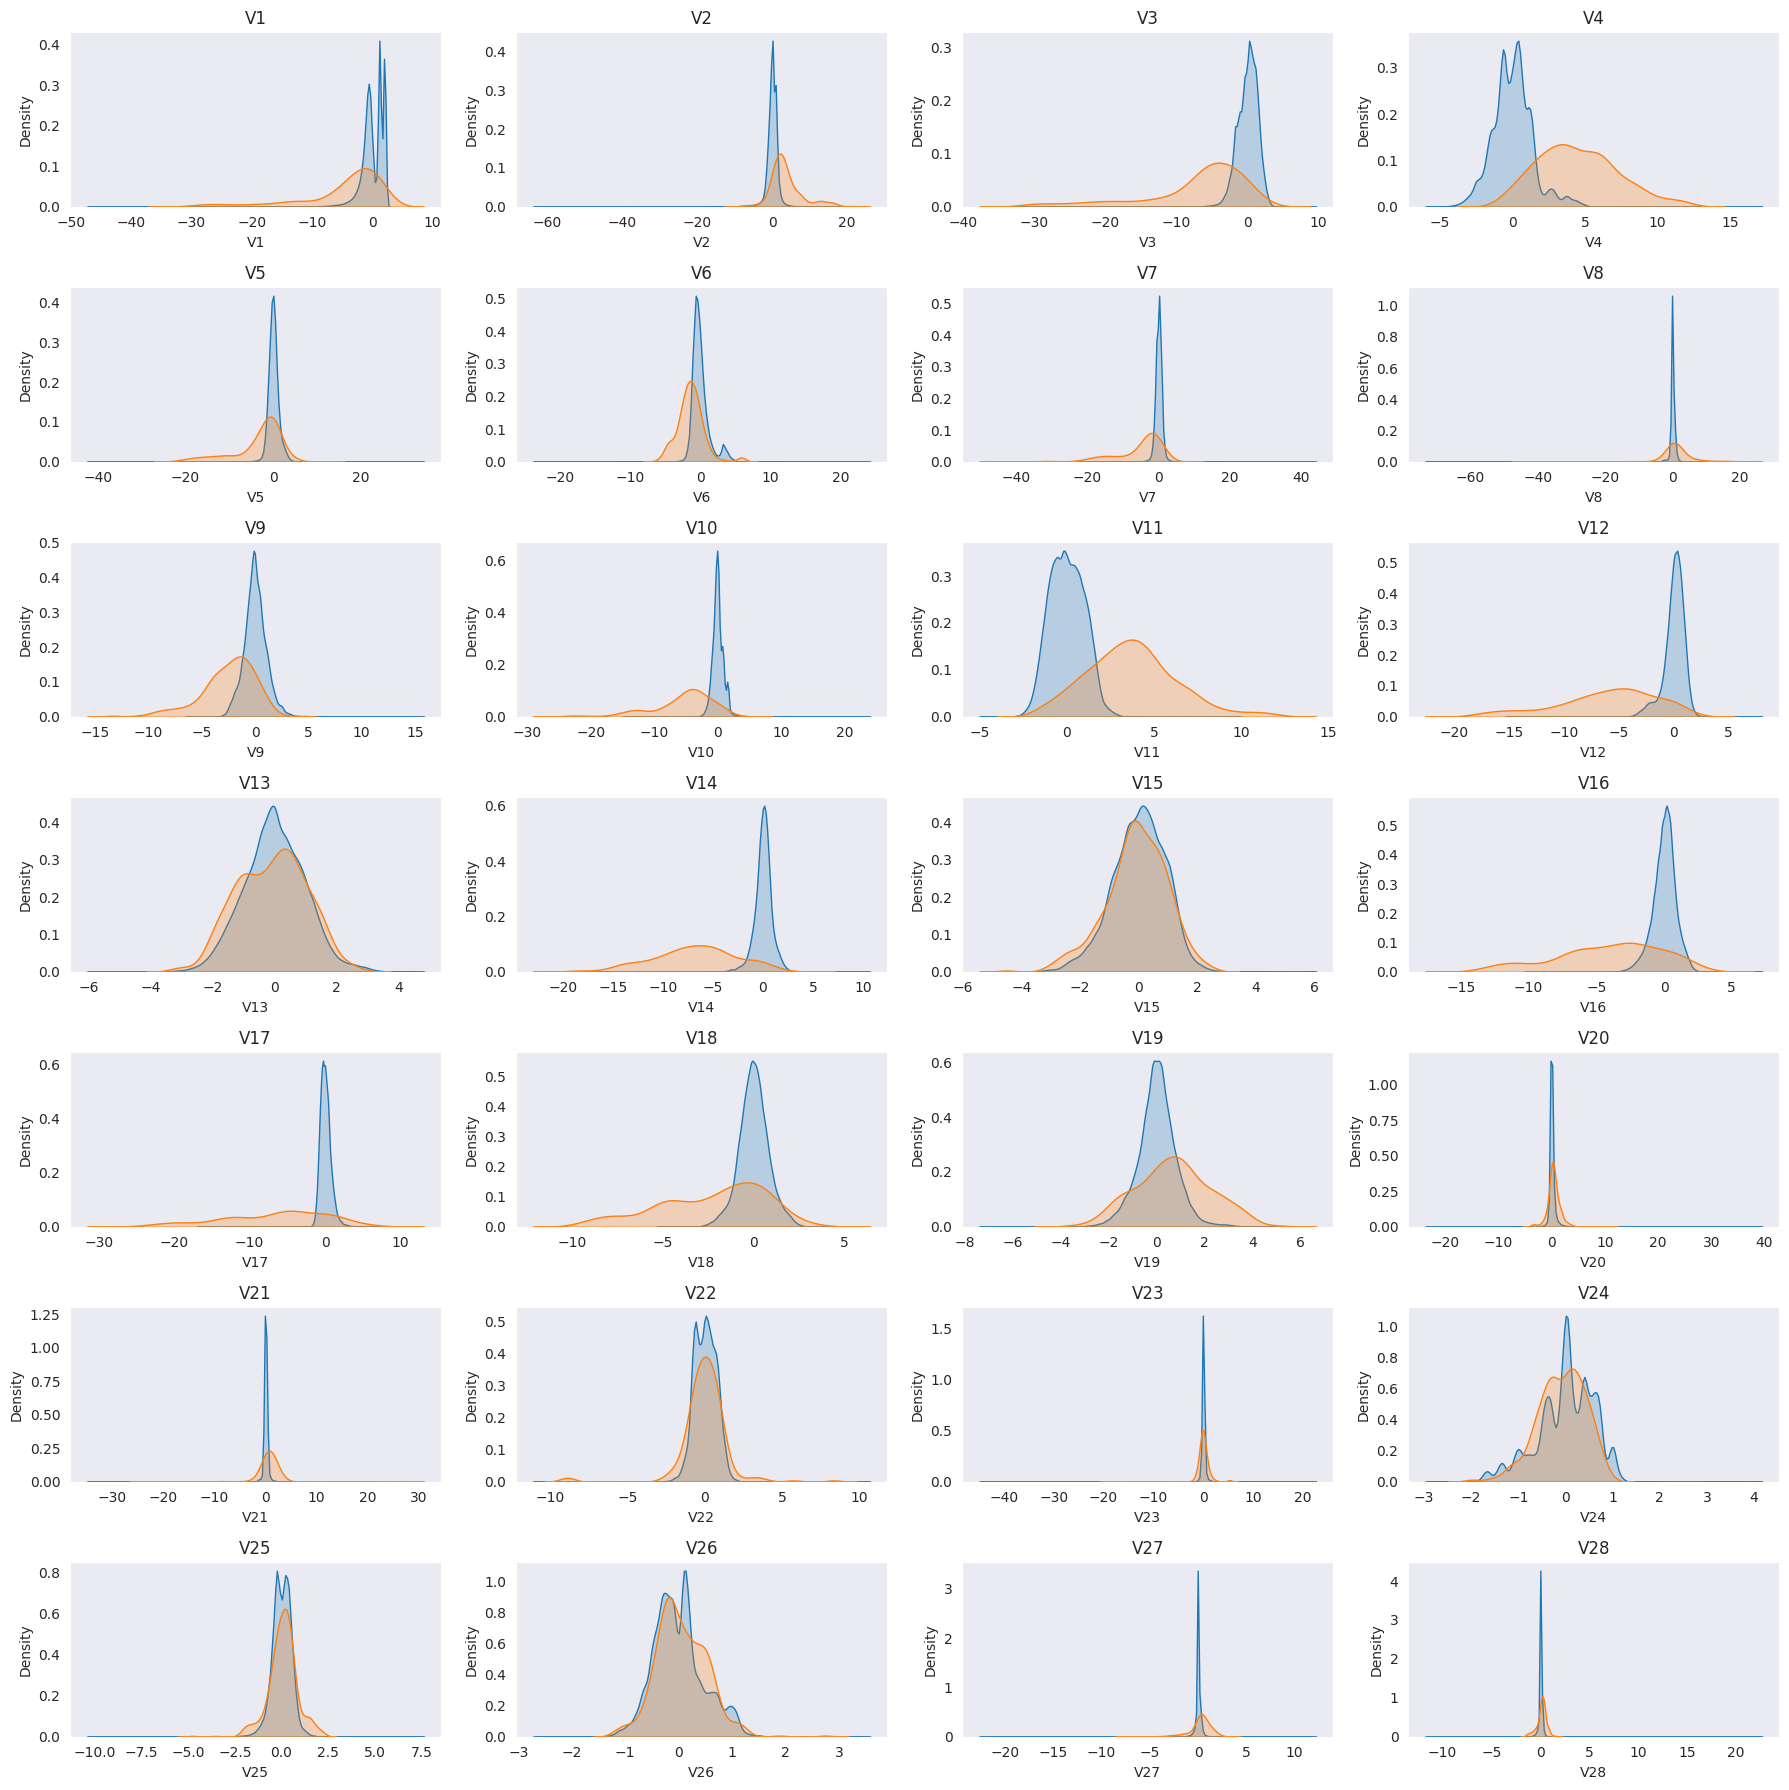

In [23]:
colnames = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
numplt = len(colnames)
Class0 = df[df.Class == 0]
Class1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for cols in colnames:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(Class0[cols], label="Class 0", shade=True)
    sns.kdeplot(Class1[cols], label="Class 1", shade=True)
    plt.title(cols)

plt.tight_layout()

* Abaixo preciso balancear a coluna **`Class`**e normalizar as colunas **`Time`, `Amount`**.

In [24]:
df1 = df.copy()

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [25]:
df1['TimeScaler'] = Scaler.fit_transform(df1.Time.values.reshape(-1,1))
df1['AmountScaler'] = Scaler.fit_transform(df1.Amount.values.reshape(-1,1))

df1 = df1.drop(['Time','Amount'],axis=1)

In [26]:
df1[:5]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,TimeScaler,AmountScaler
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996446,0.245891
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996446,-0.346480
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996425,1.169303
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996425,0.140584
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996404,-0.075150


* Agora vamos para parte do machine learning, vamos dividir os dados em treino e teste.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df1.drop('Class', axis=1)
y = df1.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, shuffle=True, random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression
Lmodel = LogisticRegression()

* Balanceamento dos dados.

In [30]:
from imblearn.under_sampling import RandomUnderSampler
Rus = RandomUnderSampler()

X_rus, y_rus = Rus.fit_resample(X_train, y_train)

In [31]:
print(pd.Series(y_rus).value_counts())

0    196
1    196
Name: Class, dtype: int64


Após fazer o balanceamento:
 0    196
1    196
Name: Class, dtype: int64


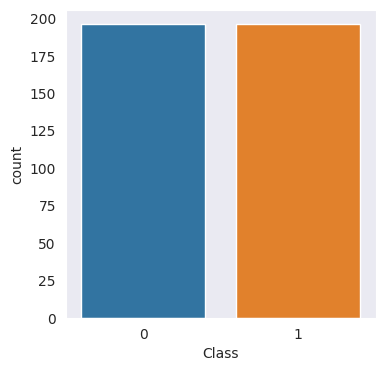

In [32]:
print('Após fazer o balanceamento:\n',pd.Series(y_rus).value_counts())
fig, ax = plt.subplots(figsize=(4,4))
sns.countplot(x=y_rus, ax=ax);

In [33]:
Xcorr = X_train.corr()
Xruscorr = pd.DataFrame(X_rus).corr()

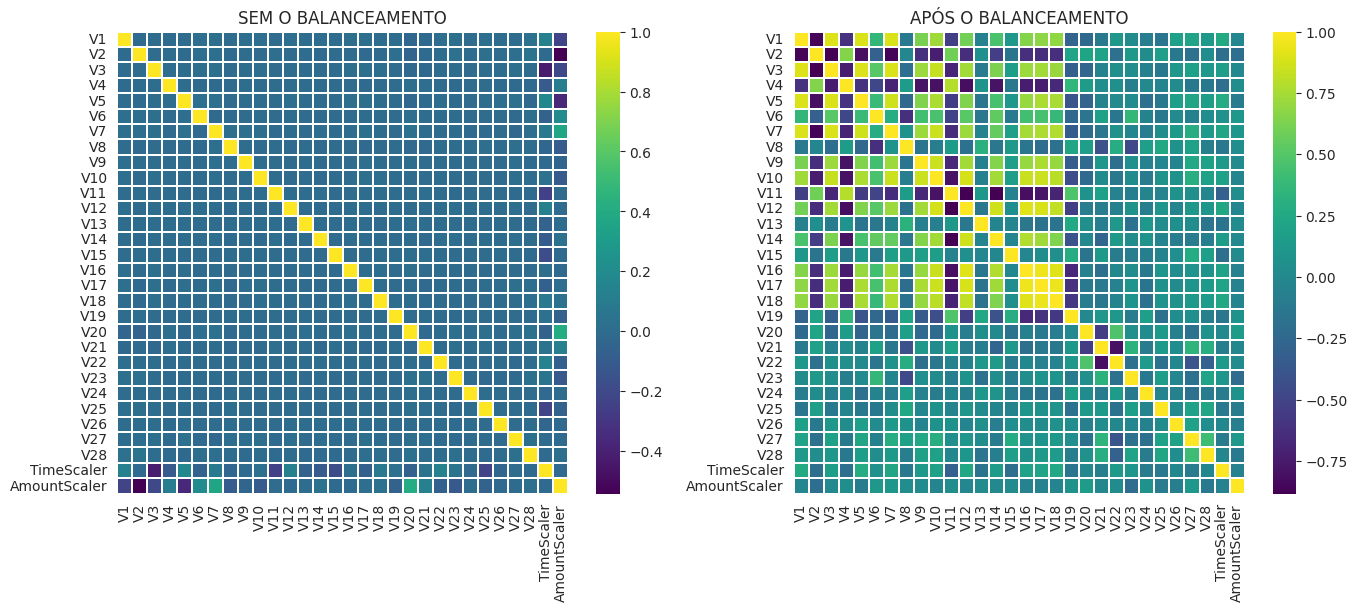

In [34]:
sns.set_style('dark')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.heatmap(Xcorr, xticklabels=Xcorr.columns, yticklabels=Xcorr.columns, cmap='viridis', linewidth=.1, ax=ax[0])
ax[0].set_title('SEM O BALANCEAMENTO')

sns.heatmap(Xruscorr, xticklabels=Xruscorr.columns, yticklabels=Xruscorr.columns, cmap='viridis', linewidth=.1, ax=ax[1])
ax[1].set_title('APÓS O BALANCEAMENTO')

plt.show()

* Notavelmente percebemos que há uma correlação na matriz após o balanceamento dos dados.
---
* Agora sim vamos treinar o modelo de machine learning.

In [35]:
Lmodel.fit(X_rus, y_rus)

# Previsões
y_pred = Lmodel.predict(X_test)
y_prob = Lmodel.predict_proba(X_test)

In [36]:
from sklearn.metrics import confusion_matrix

* Plotamos uma matriz de confusão para ver a pontuação.

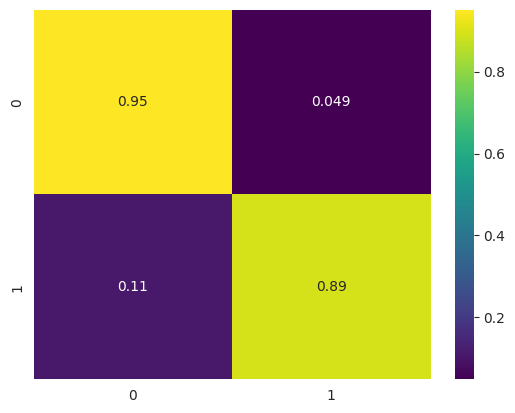

In [37]:
Matriz = confusion_matrix(y_test, y_pred,normalize='true')

sns.heatmap(Matriz, annot=True, cmap='viridis');

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9513    0.9749    113728
           1     0.0305    0.8923    0.0589       195

    accuracy                         0.9512    113923
   macro avg     0.5151    0.9218    0.5169    113923
weighted avg     0.9981    0.9512    0.9734    113923



In [56]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
print('Métrica ACCURACY:\t',accuracy_score(y_test, y_pred).round(4))
print('Métrica ROC:\t\t',roc_auc_score(y_test, y_pred).round(4))

Métrica ACCURACY:	 0.9512
Métrica ROC:		 0.9218


* Agora vamos testar o modelo treinado com uma pontuação boa nos dados do df de teste.

In [40]:
dfteste[:3]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0


* Pré processando os dados de teste, porém não vou balancear, temos que testar a máquina no dataset normal completo.

In [41]:
tst = dfteste.copy()
tstScaler = StandardScaler()

In [42]:
tst['TimeScaler'] = tstScaler.fit_transform(tst.Time.values.reshape(-1,1))
tst['AmountScaler'] = tstScaler.fit_transform(tst.Amount.values.reshape(-1,1))

tst = tst.drop(['Time', 'Amount'],axis=1)

In [43]:
tst[:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,TimeScaler,AmountScaler
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,0.655212,-0.182858
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,1.317429,-0.330062
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,1.217003,0.033961


In [44]:
Xtst = tst.drop('Class', axis=1)
ytst = tst.Class

In [45]:
ytst_pred = Lmodel.predict(Xtst)
ytst_prob = Lmodel.predict(Xtst)

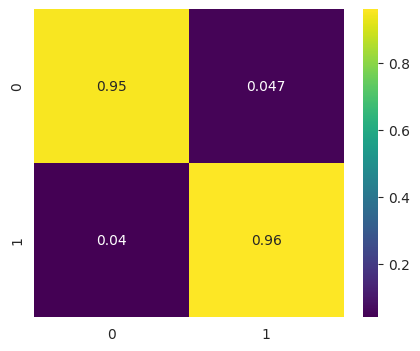

In [59]:
Matriztst = confusion_matrix(ytst, ytst_pred, normalize='true')

fig, ax = plt.subplots(figsize=(5,4))

sns.heatmap(Matriztst, annot=True, cmap='viridis');

In [60]:
print(classification_report(ytst, ytst_pred, digits=4))
print('ACCURACY:\t',accuracy_score(ytst, ytst_pred).round(5))
print('ROC:\t\t',roc_auc_score(ytst, ytst_pred).round(5))

              precision    recall  f1-score   support

           0     0.9999    0.9529    0.9758     56860
           1     0.0350    0.9604    0.0675       101

    accuracy                         0.9529     56961
   macro avg     0.5174    0.9566    0.5217     56961
weighted avg     0.9982    0.9529    0.9742     56961

ACCURACY:	 0.95292
ROC:		 0.95665


## **Conclusão:**
O modelo de regressão logística foi muito bem no dados de validação que separamos no train test split e também conseguiu uma pontuação boa com os dados de teste que separamos no início do projeto. Precisou ser feito um trabalho de préprocessamento em algumas colunas com o StandardScaler e também um balanceamento na coluna de classificação de fraude pois estava muito desbalanceada. Com os dados preparados conseguimos uma pontuação boa com o algoritmo, conseguindo identificar corretamente se há ou não há fraude em certas transações.

---

**Onde me encontrar:**
* **`linkedin:`** https://www.linkedin.com/in/piternicolas/
* **`instagram:`** https://instagram.com/pit.nlima/